In [30]:
# installing apyori package

!pip install apyori

In [31]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd

from apyori import apriori

In [8]:
# reading the dataset

df = pd.read_csv('Market_Basket_Optimisation.csv', header= None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(df.shape)

(7501, 20)


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [11]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

# having a look at the top 10 customer's items list
print(trans[1:10])

(7501, 20)
[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['fro

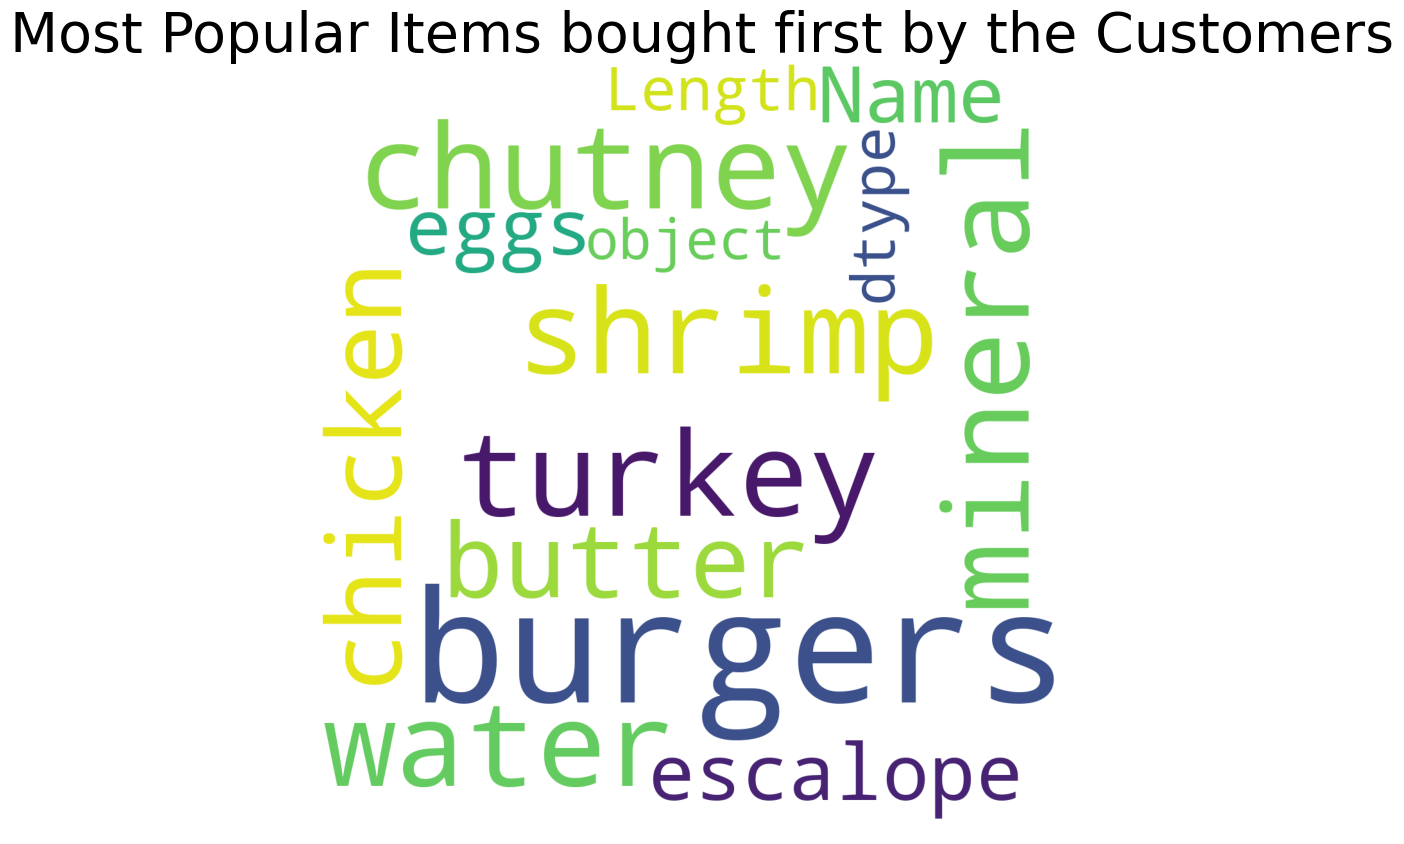

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()

C:\Users\Sahil Dhankhar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


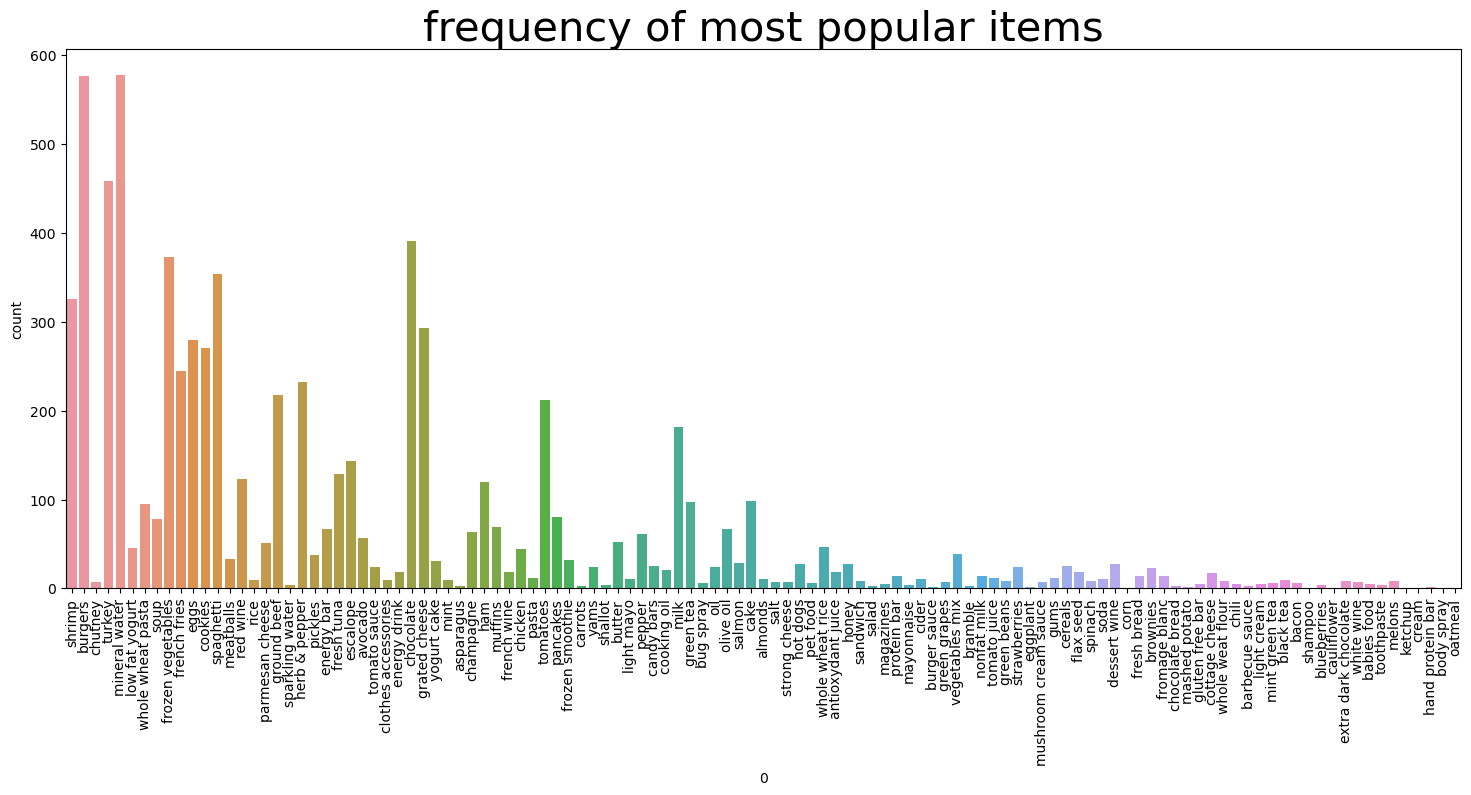

In [20]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(df[0])
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

In [21]:
# applying apriori rules to our dataset

trans = list(trans)
rules = apriori(trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [22]:
results = list(rules)


results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [27]:
!pip install wordcloud


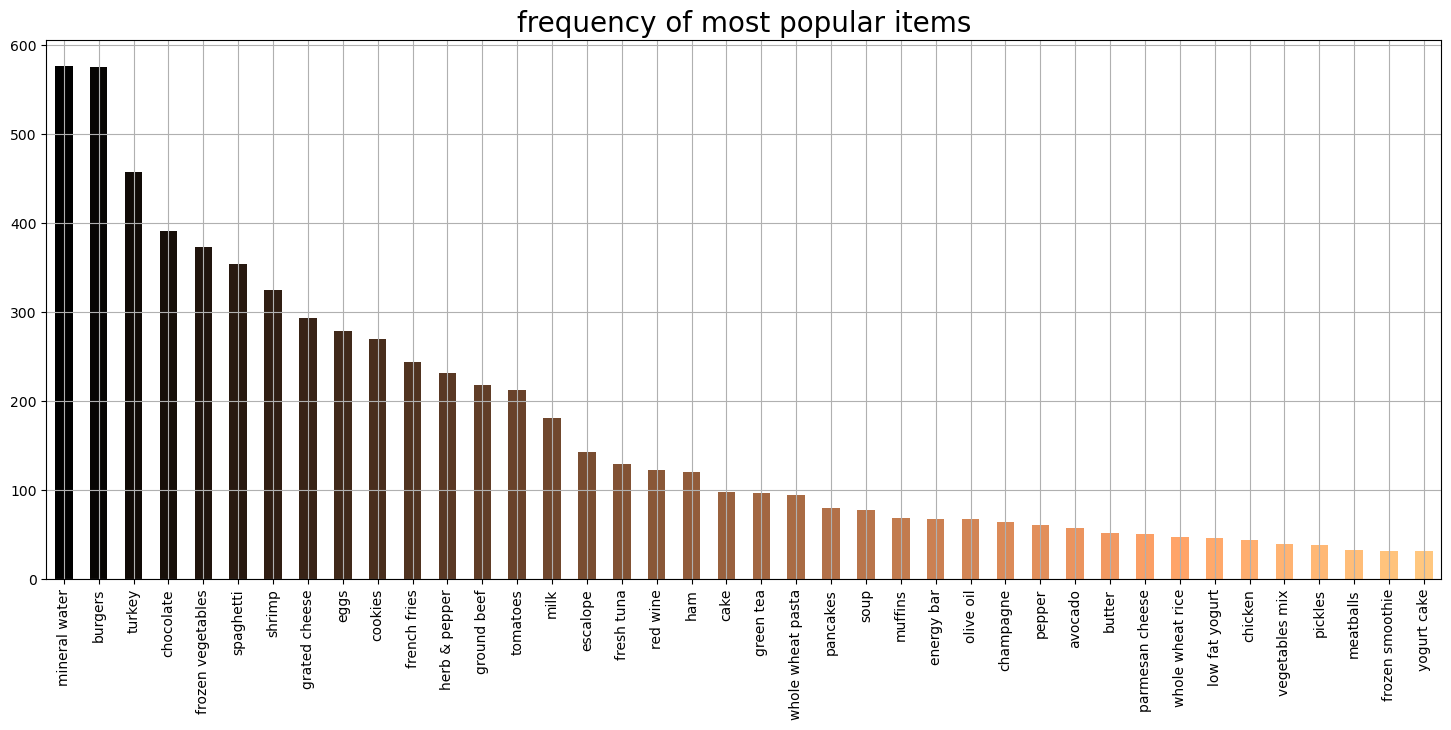

In [34]:
 #looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [41]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/'

In [38]:
!pip install squarify

In [40]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

NameError: name 'squarify' is not defined

In [42]:
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

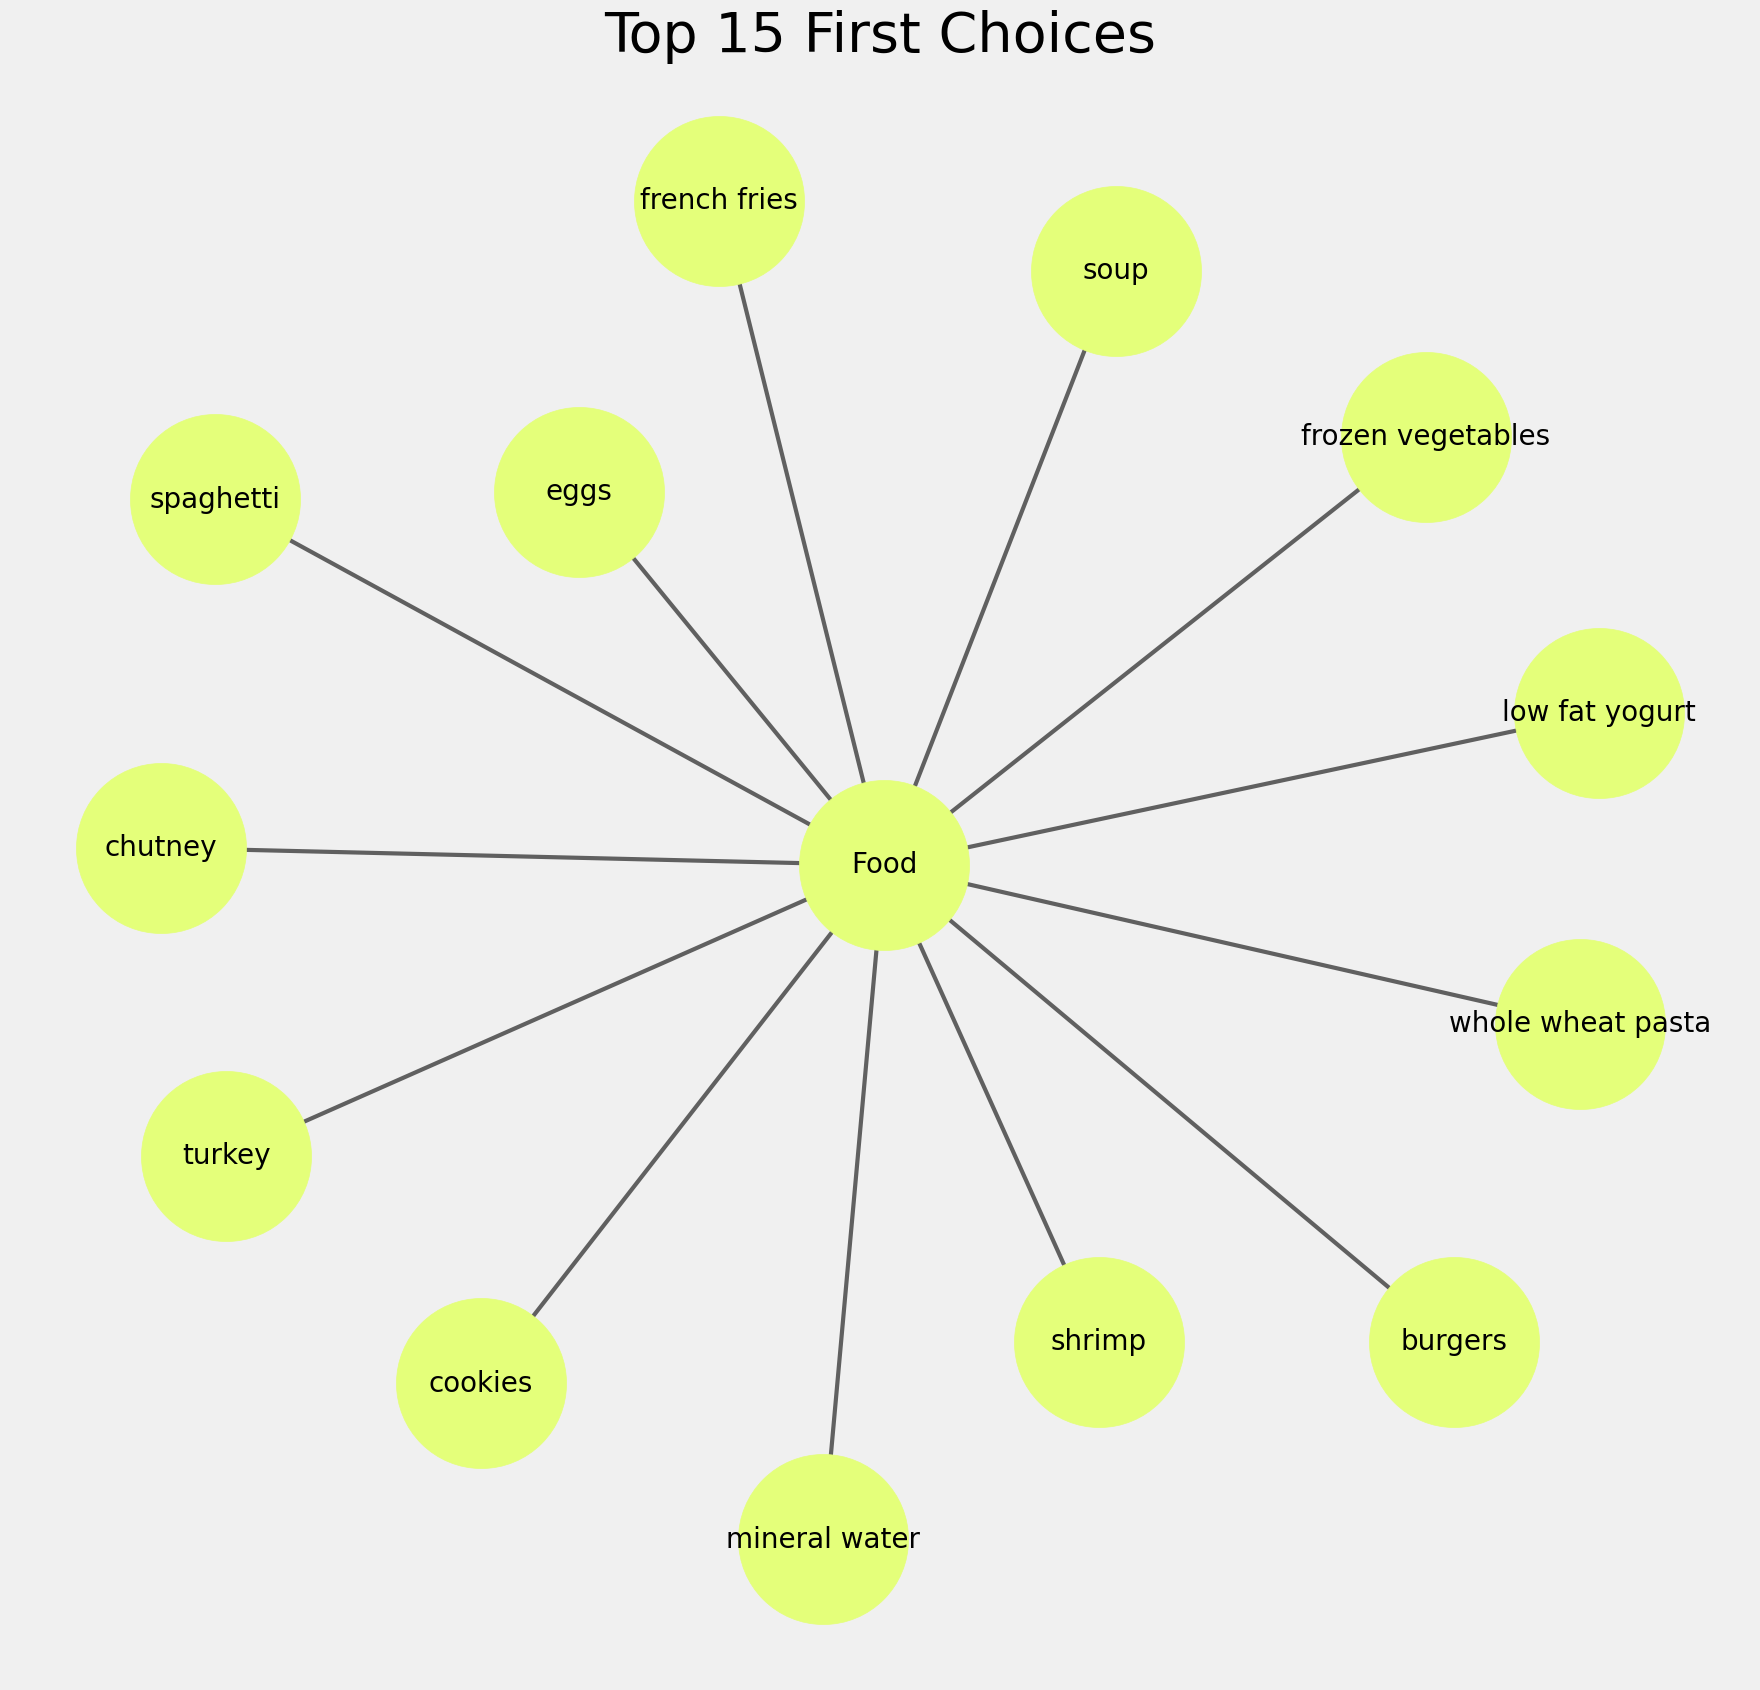

In [43]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [44]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

ModuleNotFoundError: No module named 'mlxtend'

In [46]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

TypeError: 'generator' object is not subscriptable

In [47]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

TypeError: 'generator' object is not subscriptable